In [2]:
medicare_payment_model_saved = "medicare_payment_model.pkl"

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_merge = pd.read_pickle(medicare_payment_model_saved)
df_merge.head()

,NPI,LINE_SRVC_CNT,CURRENT_RATE,PROPOSED_RATE,PRIMARYCARE_GCODE,PRIMARYCARE_GCODE_PLUS5,PRIMARYCARE_GCODE_PLUS8,PRIMARYCARE_GCODE_PLUS10,PROLONGED_VISIT_GCODE,MIN_SAVED,...,DIFFERENCE_WITH_GCODE,DIFFERENCE_WITH_GCODE_PLUS5,DIFFERENCE_WITH_GCODE_PLUS8,DIFFERENCE_WITH_GCODE_PLUS10,DIFFERENCE_WITH_GCODE_PER_BENE,PROPOSED_RATE_WITH_GCODE_PER_BENE,DIFFERENCE_WITH_GCODE_PLUS5_PER_BENE,DIFFERENCE_WITH_GCODE_PLUS8_PER_BENE,DIFFERENCE_WITH_GCODE_PLUS10_PER_BENE,DOLLARS_SAVED
0,1003000522,1034.0,98646.0,94005.0,5090.0,10260.0,13362.0,15430.0,770.5,1569.6,...,449.0,5619.0,8721.0,10789.0,1.076739,237.637890,13.474820,20.913669,25.872902,2432.88
1,1003000902,684.0,56788.0,60972.0,3255.0,6675.0,8727.0,10095.0,0.0,1072.0,...,7439.0,10859.0,12911.0,14279.0,28.833333,248.941860,42.089147,50.042636,55.344961,1661.60
2,1003001256,103.0,9057.0,9579.0,515.0,1030.0,1339.0,1545.0,0.0,164.8,...,1037.0,1552.0,1861.0,2067.0,7.054422,68.666667,10.557823,12.659864,14.061224,255.44
3,1003001884,250.0,23810.0,23250.0,1250.0,2500.0,3250.0,3750.0,502.5,400.0,...,690.0,1940.0,2690.0,3190.0,4.758621,168.965517,13.379310,18.551724,22.000000,620.00
4,1003002817,572.0,52163.0,53196.0,2860.0,5720.0,7436.0,8580.0,0.0,915.2,...,3893.0,6753.0,8469.0,9613.0,18.806763,270.801932,32.623188,40.913043,46.439614,1418.56


In [4]:
df_merge['DIFFERENCE_WITH_GCODE_PLUS_SAVED'] = df_merge['DIFFERENCE_WITH_GCODE']+df_merge['DOLLARS_SAVED']
df_merge['BENEFICIARY_AVERAGE_RISK_SCORE_BINNED'] = pd.cut(df_merge['BENEFICIARY_AVERAGE_RISK_SCORE'], 3, labels=['low', 'medium', 'high'])


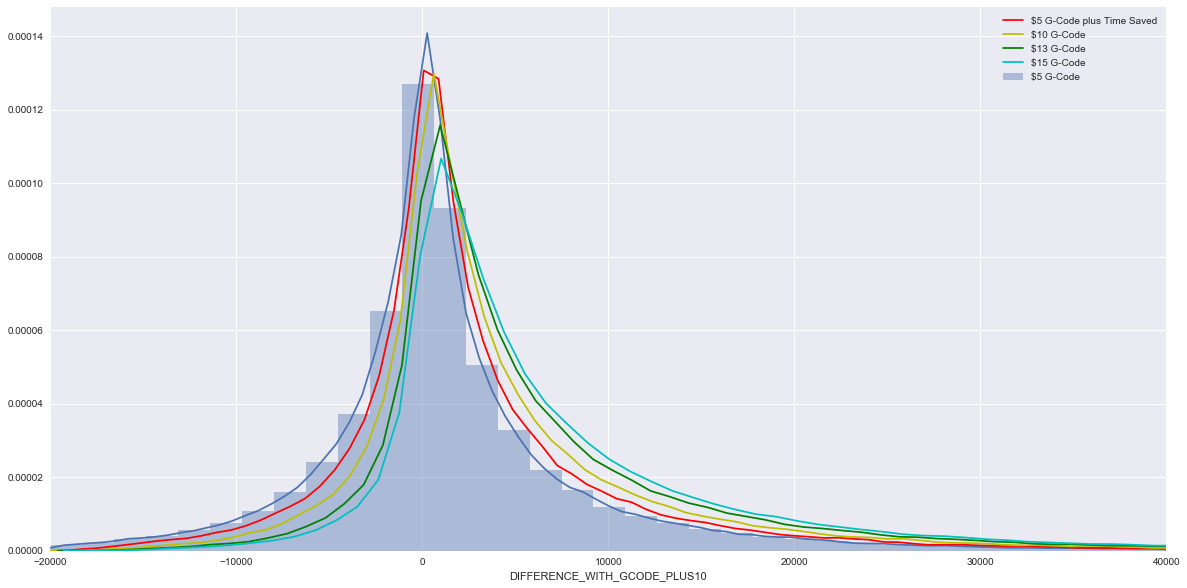

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xlim(-20000, 40000)
df_filterdDiff = df_merge.query('DIFFERENCE_WITH_GCODE > -20000 & DIFFERENCE < 40000')
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE'], hist=True, label='$5 G-Code');
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE_PLUS_SAVED'], color = 'r', hist=False, label='$5 G-Code plus Time Saved');
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE_PLUS5'], color = 'y', hist=False,kde=True, label='$10 G-Code');
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE_PLUS8'], color = 'g', hist=False,kde=True, label='$13 G-Code');
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE_PLUS10'], color = 'c', hist=False,kde=True, label='$15 G-Code');

In [6]:
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0').NPI.nunique()," - Are payment adj negative with $5 Gcode")
print(df_merge.query('DIFFERENCE_WITH_GCODE > 0').NPI.nunique()," - Are payment adj positive with $5 Gcode")
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS_SAVED > 0').NPI.nunique()," - Become payment adj positive with time saved")
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS5 > 0').NPI.nunique()," - Become payment adj positive with $10 Gcode")
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS8 > 0').NPI.nunique()," - Become payment adj positive with $13 Gcode")
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS10 > 0').NPI.nunique()," - Become payment adj positive with $15 Gcode")
print(df_merge.query('DIFFERENCE_WITH_GCODE_PLUS10 < 0').NPI.nunique()," - Remain payment adj negative with $15 Gcode")


29712  - Are payment adj negative with $5 Gcode
38794  - Are payment adj positive with $5 Gcode
5369  - Become payment adj positive with time saved
10633  - Become payment adj positive with $10 Gcode
15755  - Become payment adj positive with $13 Gcode
18365  - Become payment adj positive with $15 Gcode
11345  - Remain payment adj negative with $15 Gcode


In [7]:
g10 = df_merge.PRIMARYCARE_GCODE_PLUS10.sum() 
g8 = df_merge.PRIMARYCARE_GCODE_PLUS8.sum() 
g5 = df_merge.PRIMARYCARE_GCODE_PLUS5.sum() 
g = df_merge.PRIMARYCARE_GCODE.sum()
print(g5-g, " - Gcode $10 Additional payment")
print(g8-g, " - Gcode $13 Additional payment")
print(g10-g, " - Gcode $15 Additional payment")

195033772.0  - Gcode $10 Additional payment
312054035.1999999  - Gcode $13 Additional payment
390067544.0  - Gcode $15 Additional payment


In [8]:
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS5 > 0').DIFFERENCE_WITH_GCODE_PLUS5.sum()," - Total additional payment with $10 G-code compared to $5")
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS8 > 0').DIFFERENCE_WITH_GCODE_PLUS8.sum()," - Total additional payment with $13 G-code compared to $5")
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS10 > 0').DIFFERENCE_WITH_GCODE_PLUS10.sum()," - Total additional payment with $15 G-code compared to $5")


16864178.599999998  - Total additional payment with $10 G-code compared to $5
41791067.2  - Total additional payment with $13 G-code compared to $5
63298486.2  - Total additional payment with $15 G-code compared to $5


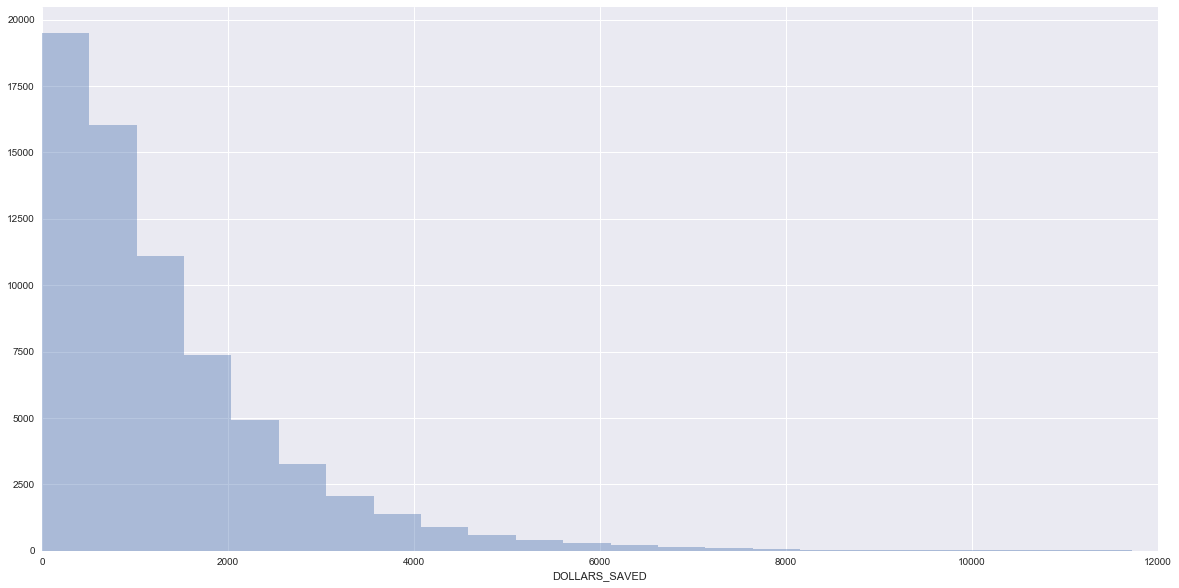

In [9]:
plt.subplots(figsize=(20,10))
plt.xlim(0, 12000)
sns.distplot(df_merge['DOLLARS_SAVED'], kde=False);

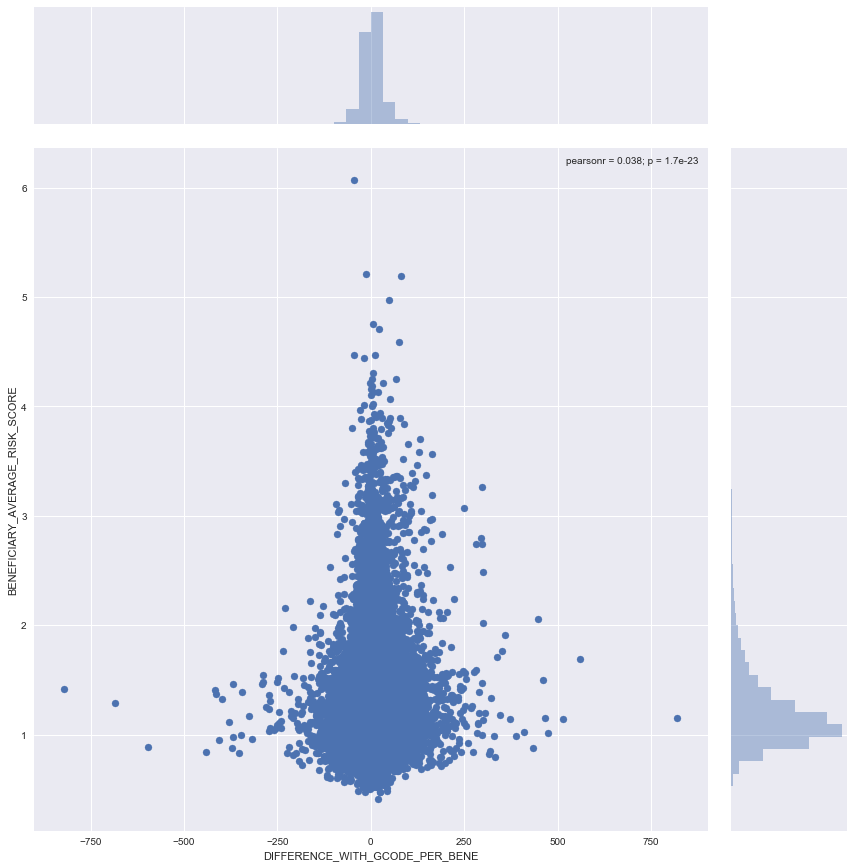

In [10]:
myplt = sns.jointplot(x="DIFFERENCE_WITH_GCODE_PER_BENE", y="BENEFICIARY_AVERAGE_RISK_SCORE", data=df_merge)
myplt.fig.set_figwidth(13)
myplt.fig.set_figheight(13)

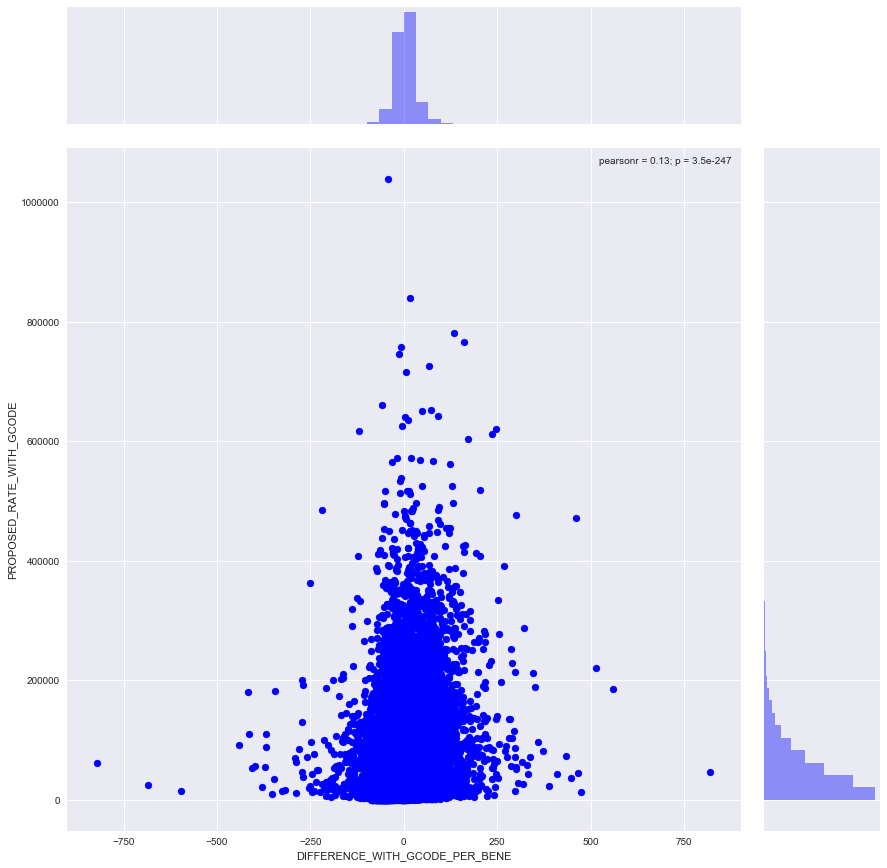

In [11]:
myplt = sns.jointplot(x="DIFFERENCE_WITH_GCODE_PER_BENE", y="PROPOSED_RATE_WITH_GCODE", data=df_merge, color='b', label="Proposed w/$5 Gcode")

myplt.fig.set_figwidth(13)
myplt.fig.set_figheight(13)

In [12]:
bins = [0, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
labels = ["11-50", "50-100", "100-200", "200-400", "400-800", "800-1600", "1600-3200", "3200-6400", "6400-12800"]
df_merge['BENE_BINNED'] = pd.cut(df_merge['TOTAL_UNIQUE_BENES'], bins=bins, labels=labels)

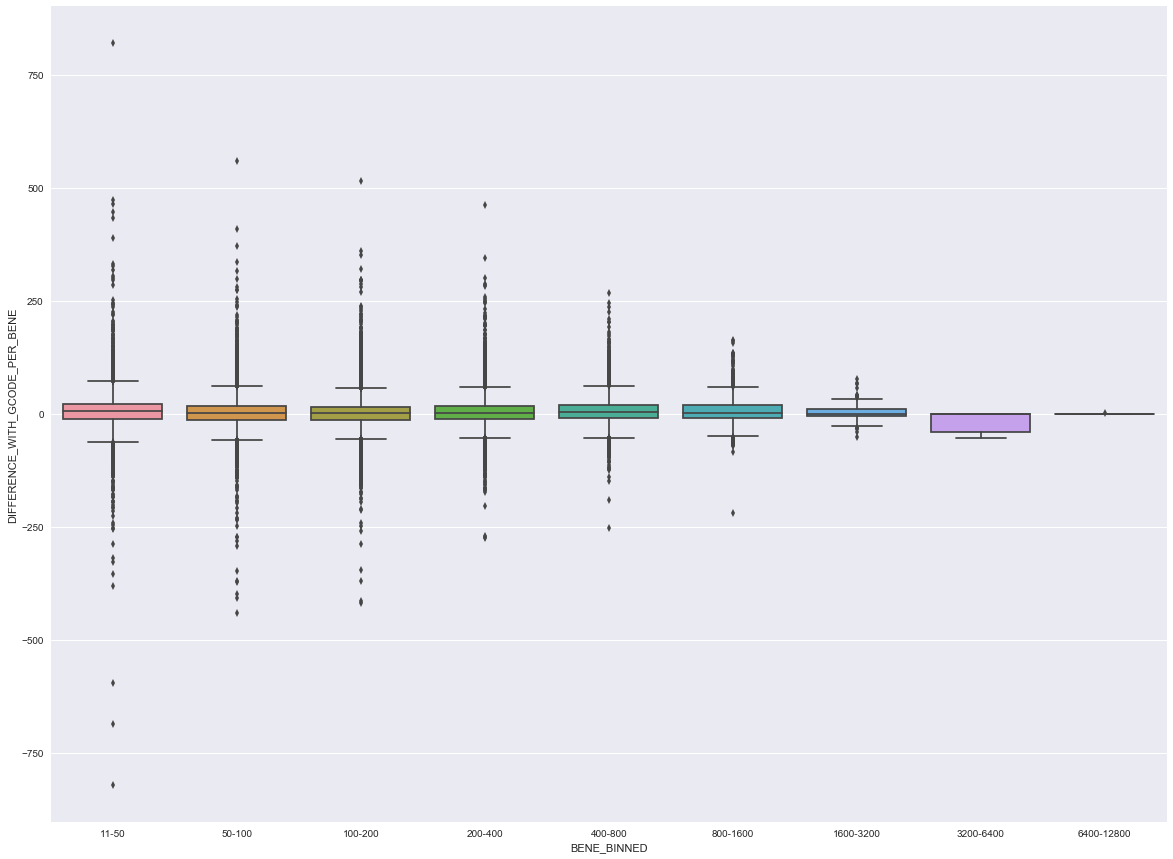

In [13]:
plt.subplots(figsize=(20,15))
sns_boxplt = sns.boxplot(y="DIFFERENCE_WITH_GCODE_PER_BENE", x="BENE_BINNED", data=df_merge)

In [14]:
df_merge.groupby('BENE_BINNED').NPI.nunique()

BENE_BINNED
11-50          5291
50-100         8710
100-200       18084
200-400       23216
400-800       11420
800-1600       1666
1600-3200       111
3200-6400        10
6400-12800        6
Name: NPI, dtype: int64

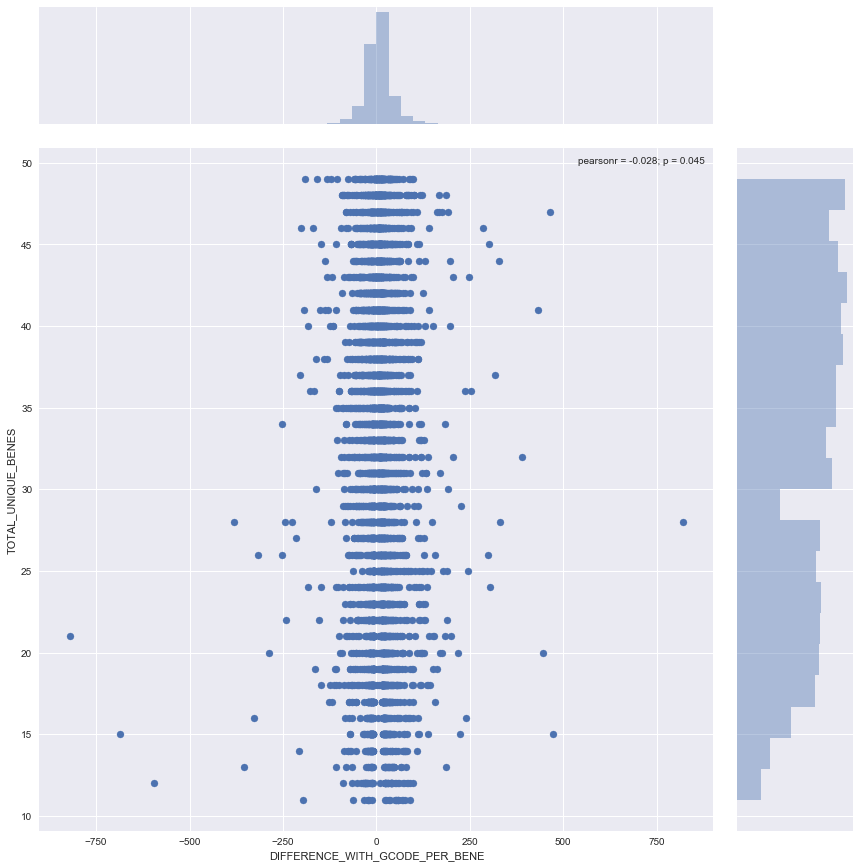

In [15]:
myplt = sns.jointplot(x="DIFFERENCE_WITH_GCODE_PER_BENE", y="TOTAL_UNIQUE_BENES", data=df_merge.query('TOTAL_UNIQUE_BENES < 50'))
myplt.fig.set_figwidth(13)
myplt.fig.set_figheight(13)